In [58]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Specify each path

In [59]:
data_directory = "../../../data/"
train_dataset = f'{data_directory}train.csv'
test_dataset = f'{data_directory}test.csv'
model_save_path = './symbol_classifier.keras'
tflite_save_path = './symbol_classifier.tflite'

# Set number of classes

In [60]:
RANDOM_SEED = 42
NUM_CLASSES = 58
MULTI_HAND_LANDMARKS = 126

# Dataset reading

In [61]:
X_train = np.loadtxt(train_dataset, delimiter=',', dtype='float32', usecols=list(range(1, MULTI_HAND_LANDMARKS + 1)))
X_test_data = np.loadtxt(test_dataset, delimiter=',', dtype='float32', usecols=list(range(1, MULTI_HAND_LANDMARKS + 1)))

In [62]:
y_train = np.loadtxt(train_dataset, delimiter=',', dtype='int32', usecols=(0))
y_test_data = np.loadtxt(test_dataset, delimiter=',', dtype='int32', usecols=(0))

In [63]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test_data, y_test_data, train_size=0.75, random_state=RANDOM_SEED)

In [64]:
print(np.unique(y_train))
print(np.unique(y_test))
print(np.unique(y_valid))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]


In [65]:
print(X_train.shape)
print(y_train.shape)

(24289, 126)
(24289,)


# Model building

In [66]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((126, )),
    # tf.keras.layers.BatchNormalization(),  # Normalizes input features
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')  # Output layer with 57 units
])

In [67]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [68]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               32512     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 58)               

In [70]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_valid, y_valid),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
178/190 [===========================>..] - ETA: 0s - loss: 3.3590 - accuracy: 0.1452
Epoch 1: saving model to .\symbol_classifier.keras
190/190 [==============================] - 1s 3ms/step - loss: 3.3173 - accuracy: 0.1523 - val_loss: 2.3515 - val_accuracy: 0.3506
Epoch 2/1000
182/190 [===========================>..] - ETA: 0s - loss: 2.2147 - accuracy: 0.3415
Epoch 2: saving model to .\symbol_classifier.keras
190/190 [==============================] - 0s 3ms/step - loss: 2.2028 - accuracy: 0.3442 - val_loss: 1.4954 - val_accuracy: 0.5880
Epoch 3/1000
177/190 [==========================>...] - ETA: 0s - loss: 1.6936 - accuracy: 0.4714
Epoch 3: saving model to .\symbol_classifier.keras
190/190 [==============================] - 1s 3ms/step - loss: 1.6828 - accuracy: 0.4754 - val_loss: 1.1515 - val_accuracy: 0.6941
Epoch 4/1000
170/190 [=========================>....] - ETA: 0s - loss: 1.3926 - accuracy: 0.5631
Epoch 4: saving model to .\symbol_classifier.keras
190/190 [==

In [71]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

59/59 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.9576


In [72]:
model = tf.keras.models.load_model(model_save_path)

In [73]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))
print(y_test[0])

1/1 [==============================] - 0s 52ms/step
[9.83898169e-18 7.23180960e-10 3.42515506e-07 2.61746254e-06
 3.38490680e-10 3.46082260e-11 1.18462618e-12 1.33086478e-12
 1.21888682e-20 3.12116083e-10 9.18145514e-15 5.64493213e-23
 1.70478128e-20 9.26613029e-26 8.67275023e-16 2.72278413e-08
 6.48779154e-04 4.67710141e-11 7.95762404e-04 3.01793546e-09
 2.71054461e-16 1.18373351e-24 6.71953999e-26 1.12754463e-19
 1.83144042e-10 2.33618144e-23 8.91506677e-17 5.69246907e-13
 6.56300401e-19 9.98547256e-01 4.35076845e-06 1.80768560e-17
 2.70784263e-12 3.72809191e-19 3.22106655e-21 2.02310069e-23
 7.50089264e-15 3.03734868e-14 4.00821459e-10 7.96727525e-25
 8.30983637e-09 2.83018518e-26 9.32765048e-21 4.28607995e-13
 6.66157450e-12 4.77335041e-16 2.11243205e-24 4.82085900e-22
 2.12722520e-21 4.91509198e-17 8.69451128e-07 3.03287451e-10
 2.58009912e-19 4.66260308e-10 1.33084096e-17 1.41021079e-13
 1.91643470e-15 1.05254734e-20]
29
29


# Confusion matrix

235/235 [==============================] - 0s 836us/step


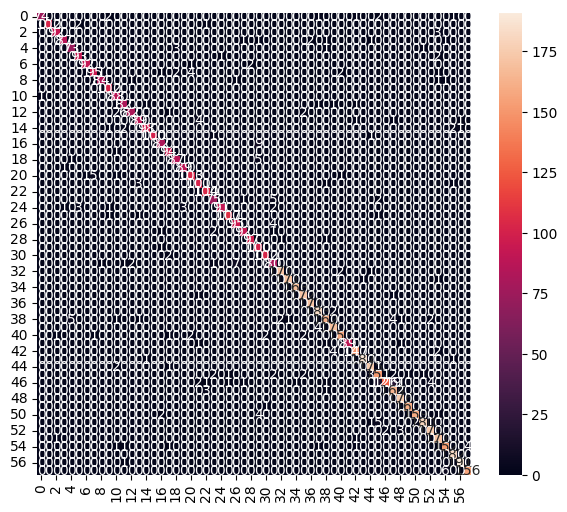

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        81
           1       1.00      0.97      0.99       105
           2       0.98      0.97      0.97        95
           3       0.98      0.93      0.95        94
           4       0.92      0.94      0.93        78
           5       0.95      0.97      0.96        96
           6       0.98      0.97      0.97        95
           7       0.93      0.89      0.91       107
           8       0.98      0.94      0.96        89
           9       0.95      1.00      0.98       102
          10       0.91      0.99      0.95        89
          11       0.88      0.94      0.91        87
          12       0.96      0.88      0.92        93
          13       0.95      0.93      0.94        96
          14       0.98      0.94      0.96       104
          15       1.00      0.98      0.99       102
          16       0.94      0.90      0.92        91
     

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [75]:
# Save as a model dedicated to inference
model.save(model_save_path)

In [76]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\zeins\AppData\Local\Temp\tmplhyl_pft\assets


INFO:tensorflow:Assets written to: C:\Users\zeins\AppData\Local\Temp\tmplhyl_pft\assets


81752

In [77]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [78]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [79]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
51
CPU times: total: 0 ns
Wall time: 1.01 ms
